# Estructura de la red
La red de bicicletas puede ser considerada como una estructura de procesamiento de informacion donde los nodos son las unidades de procesamiento y el camino que los vincula, la conexión.

Estructura de la red:
    
    1) NODOS: Estaciones
    2) CONEXION (edge): Camino | Recorrido | Calles
    3) PESOS (intensidad de la conexion): cantidad de usuarios? | tiempo de uso? | distancia en km?
    4) DIRECCIONALIDAD: Dirigido o No dirigido?  Podria pensarse como dirigido o dirigido reciproco con self-loops
    5) TAMAÑO
    

In [1]:
# librerias 
import pandas as pd
#import geopandas as gpd
import numpy as np

In [2]:
# librerias 
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
import seaborn as sns

In [6]:
cd ..

/home/human/Dropbox/doctorado/chapter00_courses/network_science_sarraute/spiderman


In [4]:
df18 = pd.read_csv('/home/human/Documents/docto_local/caba_bicis_2018_recorridos.csv')

In [8]:
# Instanciamos un grafo direccionado
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [9]:
# Esto me parece que seria pensando a las personas como nodo
# Funcion para crear edges en una red de transporte

def vinculos_e_nodos(df, columna1, columna2):
    '''
    Devuelve los extremos conectados por un vinculo (edge)
    '''
    
    origen = df[columna1]
    destino = df[columna2]
    
    vinculados = zip(origen,destino)
    
    return list(vinculados)

In [10]:
edges = vinculos_e_nodos(df18, 'bici_estacion_origen', 'bici_estacion_destino')

In [11]:
# Creamos una lista de edges (estacion_n, estacion_k)
D.add_edges_from(edges)

In [12]:
len(D.edges())

38483

In [13]:
len(D.nodes())

201

In [44]:
agrupado1 = df18.groupby(['bici_nombre_estacion_origen','bici_nombre_estacion_destino']).size().reset_index(name='recorridos')
agrupado1.columns = ['origen','destino','recorridos']

In [45]:
agrupado1.head()

,origen,destino,recorridos
0,15 de Noviembre,15 de Noviembre,494
1,15 de Noviembre,25 de Mayo,2
2,15 de Noviembre,9 de Julio,7
3,15 de Noviembre,Acevedo,26
4,15 de Noviembre,Acuña de Figueroa,10


In [ ]:
nx.from_pandas_edgelist()

In [14]:
# Se crea una funcion para generar el grafo de la red de transporte
def graphmaker(df, origen, destino):
    '''
    Devuelve un grafo compuesto por estaciones(nodos) y recorridos(vinculos) para cada dataframe.
    ...
    Argumentos:
    
    df = dataframe de recorridos
    origen = Serie del dataframe referenciando la estacion de origen del grafo
    destino = Serie del dataframe referenciando la estacion de destino del grafo
    '''
    agrupado = df.groupby([origen,destino]).size().reset_index(name='recorridos')
    agrupado.columns = ['origen','destino','recorridos']
    bicigrafo = nx.from_pandas_edgelist(agrupado,'origen','destino','recorridos')
    return bicigrafo

In [63]:
# Aplicamos la funcion para cada dataset y asi obtenemos el grafo de la red de bicicletas de cada año
# bicigrafo 2015
b18 = graphmaker(df18,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

In [64]:
b18.get_edge_data("15 de Noviembre","25 de Mayo")

{'recorridos': 7}

In [65]:
# 1) Cantidad de nodos(estaciones) y ejes(recorridos) de cada dataset
n18, e18 = len(b18.nodes()), len(b18.edges())

In [66]:
n18

199

In [67]:
e18

19574

## Medidas de Accesibilidad y Centralidad

         Un tema importante para analizar es la accesibilidad topológica de cada nodo en la red, teniendo en cuenta la cantidad de arcos que es necesario atravesar para llegar a un nodo de referencia desde cualquier otro. De esta forma los nodos adquieren una jerarquía en función de la facilidad de acceso desde cada uno a los demás.

In [57]:
b18.adjacency

<bound method Graph.adjacency of <networkx.classes.graph.Graph object at 0x7efca58e0668>>

In [68]:
b18_adj = nx.adjacency_matrix(b18, weight = 'recorridos')

In [69]:
b18_adjmat = b18_adj.todense()
b18_adjmat

matrix([[ 494,    7,   12, ...,    3,    1,    0],
        [   7, 1246,   62, ...,    1,   31,    0],
        [  12,   62,  308, ...,    0,   34,    0],
        ...,
        [   3,    1,    0, ...,  425,    5,    0],
        [   1,   31,   34, ...,    5,  385,    0],
        [   0,    0,    0, ...,    0,    0,    5]], dtype=int64)

In [70]:
np.shape(b18_adjmat)

(199, 199)

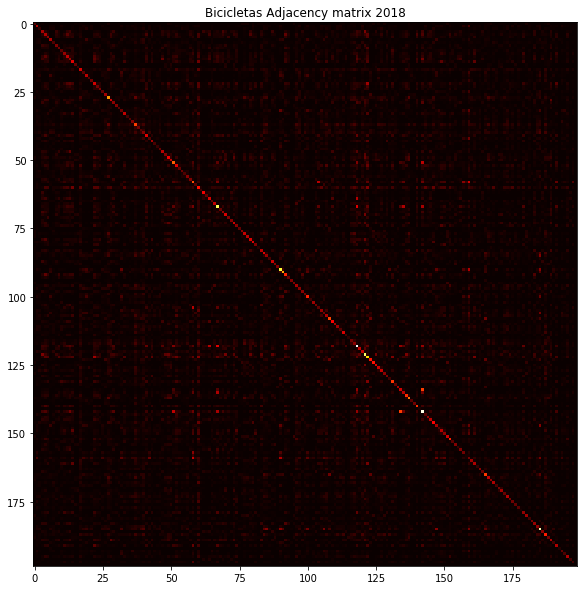

In [73]:
#plt.(b18_adjmat)
plt.figure(figsize=(20,10))
plt.imshow(b18_adjmat, cmap='hot', interpolation='nearest')
plt.title("Bicicletas Adjacency matrix 2018")
plt.show()

In [ ]:
b18_adjmat

In [75]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(0)

In [126]:
sc = SpectralClustering(3, affinity='precomputed', n_init=100)
sc.fit(b18_adjmat)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=3, n_init=100, n_jobs=1,
          n_neighbors=10, random_state=None)

In [127]:
print('spectral clustering')
print(sc.labels_)

spectral clustering
[0 1 1 0 2 2 1 1 0 2 1 2 2 2 2 0 0 1 1 1 1 1 2 2 0 1 1 0 0 2 0 0 1 2 1 1 1
 1 1 1 1 2 1 2 1 1 1 2 0 0 0 2 2 2 1 1 1 2 2 1 2 0 0 0 2 1 0 2 0 2 0 2 0 0
 2 1 0 0 0 0 0 2 0 0 1 1 1 0 0 1 1 1 2 2 1 0 1 1 0 1 1 1 1 2 2 1 1 1 1 2 0
 1 1 0 2 1 0 0 2 0 1 0 2 1 0 0 0 0 0 0 1 2 1 1 2 2 0 0 1 1 2 1 2 1 2 2 0 1
 1 2 2 0 0 1 0 0 2 1 1 1 0 2 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 2 0 1 1 0 1
 1 0 1 0 0 1 2 1 1 1 0 0 1 1]


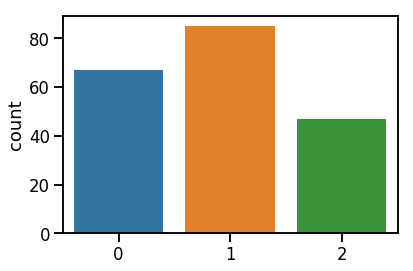

In [128]:
sns.countplot(sc.labels_)
plt.show()

In [129]:
from numpy import linalg as LA
w, v = LA.eig(b18_adjmat)

In [130]:
np.shape(v)

(199, 199)

In [131]:
np.shape(np.ravel(v[sc.labels_==0,0]))

(67,)

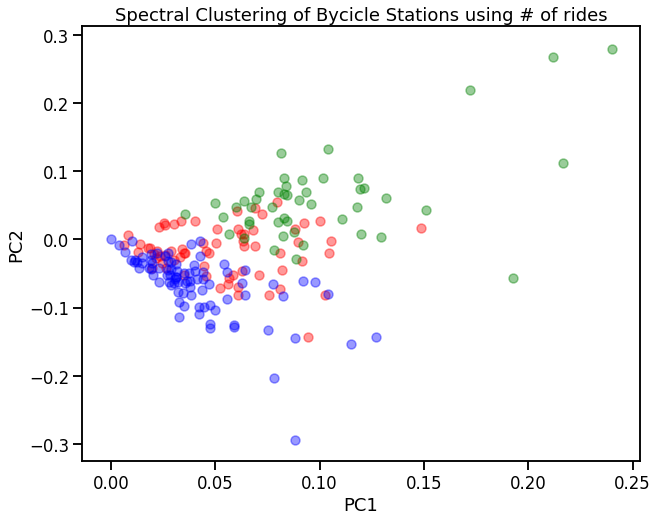

In [133]:
sns.set_context("talk")
plt.figure(figsize=(10,8))
plt.scatter(np.ravel(v[sc.labels_==0,0]),np.ravel(v[sc.labels_==0,1]), c = 'r', alpha = 0.4, s = 80)
plt.scatter(np.ravel(v[sc.labels_==1,0]),np.ravel(v[sc.labels_==1,1]), c = 'b', alpha = 0.4, s = 80)
plt.scatter(np.ravel(v[sc.labels_==2,0]),np.ravel(v[sc.labels_==2,1]), c = 'g', alpha = 0.4, s = 80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Spectral Clustering of Bycicle Stations using # of rides")
plt.show()